# Hometask New Yorker

### 1. Association Analysis Reporting

In [36]:
 import gc 
 gc.collect()
 %reset -f
import zipfile,fnmatch,os

rootPath = r"C:\\Users\\Hannah\\jupyter_folder"
pattern = '*.zip'
for root, dirs, files in os.walk(rootPath):
    for filename in fnmatch.filter(files, pattern):
        print(os.path.join(root, filename))
        zipfile.ZipFile(os.path.join(root, filename)).extractall(os.path.join(root, os.path.splitext(filename)[0]))

C:\\Users\\Hannah\\jupyter_folder\instacart-market-basket-analysis.zip
C:\\Users\\Hannah\\jupyter_folder\instacart-market-basket-analysis\aisles.csv.zip
C:\\Users\\Hannah\\jupyter_folder\instacart-market-basket-analysis\departments.csv.zip
C:\\Users\\Hannah\\jupyter_folder\instacart-market-basket-analysis\orders.csv.zip
C:\\Users\\Hannah\\jupyter_folder\instacart-market-basket-analysis\order_products__prior.csv.zip
C:\\Users\\Hannah\\jupyter_folder\instacart-market-basket-analysis\order_products__train.csv.zip
C:\\Users\\Hannah\\jupyter_folder\instacart-market-basket-analysis\products.csv.zip
C:\\Users\\Hannah\\jupyter_folder\instacart-market-basket-analysis\sample_submission.csv.zip


In [37]:
import pandas as pd
order_prod = pd.read_csv('C:\\Users\\Hannah\\jupyter_folder\\instacart-market-basket-analysis\\order_products__prior.csv\\order_products__prior.csv')
prod = pd.read_csv('C:\\Users\\Hannah\\jupyter_folder\\instacart-market-basket-analysis\\products.csv\\products.csv')

In [45]:
data = pd.merge(order_prod,prod,how='inner',on='product_id')

Consider only the first 30.000 orders in order to limit memory expenditures

In [46]:
data = data[data['order_id']<30000]

Prepare the data for the a priori algorithm

In [47]:
df_item = data[['order_id','product_name']].copy()
df_item.rename(columns={'order_id':'order','product_name':'items'},inplace=True)
df_item['temp']=True
df = df_item.groupby(['order','items'])['temp'].any().unstack().fillna(False)

Run the a priori algorithm

In [60]:
from mlxtend.frequent_patterns import apriori
freq_itemsets = apriori(df,min_support=0.01,use_colnames=True)

In [61]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_itemsets,metric='lift',min_threshold=1)
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,Organic Fuji Apple,Banana,0.027887,0.148874,0.010502,0.376590,2.529599,0.006350,1.365276,0.622027
8,Cucumber Kirby,Banana,0.031080,0.148874,0.010467,0.336758,2.262041,0.005840,1.283282,0.575818
5,Organic Raspberries,Bag of Organic Bananas,0.043463,0.119993,0.013305,0.306122,2.551171,0.008090,1.268246,0.635650
13,Organic Avocado,Banana,0.054674,0.148874,0.016498,0.301752,2.026903,0.008359,1.218946,0.535939
3,Organic Hass Avocado,Bag of Organic Bananas,0.066844,0.119993,0.018946,0.283439,2.362135,0.010925,1.228099,0.617961
22,Strawberries,Banana,0.045343,0.148874,0.012844,0.283255,1.902656,0.006093,1.187489,0.496952
10,Large Lemon,Banana,0.046159,0.148874,0.012099,0.262106,1.760596,0.005227,1.153454,0.452917
7,Organic Strawberries,Bag of Organic Bananas,0.079688,0.119993,0.018627,0.233749,1.948023,0.009065,1.148458,0.528798
14,Organic Baby Spinach,Banana,0.075111,0.148874,0.016463,0.219178,1.472244,0.005281,1.090039,0.346814
21,Organic Strawberries,Banana,0.079688,0.148874,0.017456,0.219056,1.471424,0.005593,1.089869,0.348128


Build a heatmap displaying the association rules

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

apriori_rules = rules.pivot(index="antecedents", columns="consequents", values="confidence")

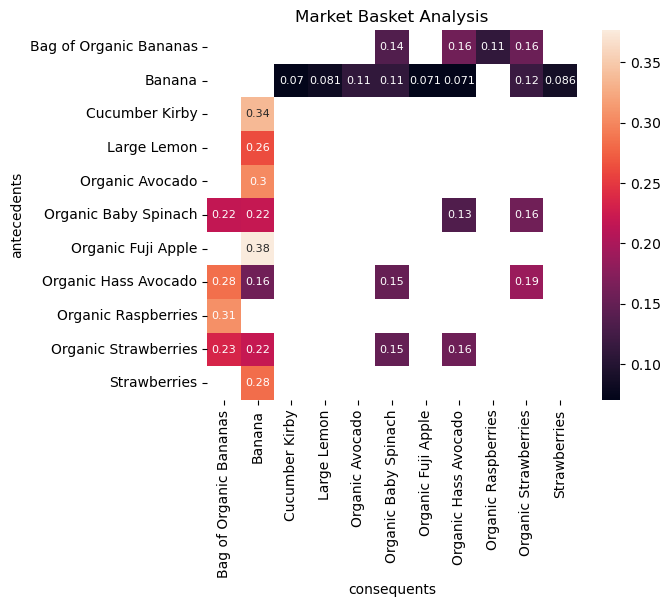

In [66]:
ax = sns.heatmap(apriori_rules, annot=True, square=True,annot_kws={'size': 8})
plt.title("Market Basket Analysis")
plt.show()

### 2. Free Analysis